# Resampling Methods

Resampling Methods: involve repeatedly drawing samples from a training set and refitting a model
of interest on each sample in order to obtain additional information about
the fitted model. 


For example: in order to estimate the variability of a linear regression fit, we can repeatedly draw different samples from the training
data, fit a linear regression to each new sample, and then examine the
extent to which the resulting fits differ. 


Such an approach may allow us to
obtain information that would not be available from fitting the model only once using the original training sample.

We discuss two of the most commonly
used resampling methods: *cross-validation* and the *bootstrap*.

## Cross-Validation-Validation Sets

In general: We are interested in test error performance: What happens in the absence of large designated test set? 

- mathematical adjustment to the training error rate in order to
estimate the test error rate.
- here: consider a class of methods that estimate the
test error rate by holding out a subset of the training observations from the
fitting process, and then applying the statistical learning method to those
held out observations.

The simplest strategy: **Validation set approach.**

- Randomly divide the available set of observations into two parts, a training set and a validation set or hold-out set.
- fit the model on the training set.
- fitted model is used to predict the
responses for the observations in the validation set.
- validation set error rate%—typically assessed using MSE in the case of a quantitative response—
provides an estimate of the test error rate.

__The problem__: Test MSE highly dependent on the specific hold-out sample.

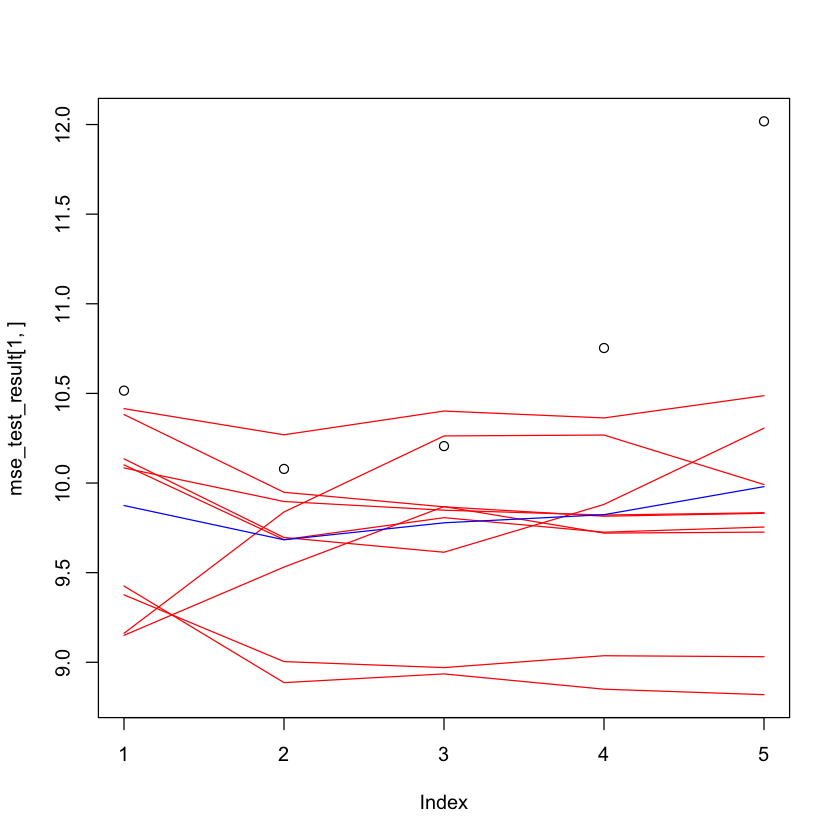

In [7]:
n = 500
beta =c(5, -0.5)
varx=1.5
vare=10

tr_prop<-0.5

# a) ###generate the training data
x2 = rnorm(n=n, mean=0, sd=varx**0.5)
x1<-rep(1,n)
x = cbind(x1, x2)

emp = rnorm(n=n, mean=0, sd=vare**0.5)

y = x%*%beta + emp

############make into dataframe###################

data<-cbind(y,x)
train_ind <- sample(seq_len(nrow(data)), size = tr_prop*n)

data_training<- data[train_ind, ]
data_test <-data[-train_ind, ]


x2_train<-data_training[,3]
y_train<-data_training[,1]
x2_test<-data_test[,3]
y_test<-as.vector(data_test[,1])

########################################################
###calculate the error for the different polynomials####

x_train_ = matrix(data=rep(1, tr_prop*n), nrow=tr_prop*n, ncol=1)
x_test_ = matrix(data=rep(1, length(y_test)), nrow=length(y_test), ncol=1)
sim_rep=10
poly_degree<-4
mse_test_result = matrix(nrow = sim_rep, ncol = poly_degree + 1)
mse_train_result = matrix(nrow = sim_rep, ncol = poly_degree + 1)


for(sim in 1:sim_rep)
{
  data<-cbind(y,x)
  train_ind <- sample(seq_len(nrow(data)), size = tr_prop*n)
  data_training<- data[train_ind, ]
  data_test <-data[-train_ind, ]
  x2_train<-data_training[,3]
  y_train<-data_training[,1]
  x2_test<-data_test[,3]
  y_test<-as.vector(data_test[,1])
  
  ########################################################
  ###calculate the error for the different polynomials####
  
  x_train_ = matrix(data=rep(1, tr_prop*n), nrow=tr_prop*n, ncol=1)
  x_test_ = matrix(data=rep(1, length(y_test)), nrow=length(y_test), ncol=1)
  for (i in 0:4) {
    if (i > 0){
      x_train_ = cbind(x_train_, x2_train**i)
      x_test_ = cbind(x_test_, x2_test**i)
    }
    b_train = solve(t(x_train_)%*%x_train_)%*%(t(x_train_)%*%y_train)
    y_train_hat = x_train_%*%b_train
    mse_train = mean((y_train - y_train_hat)**2)
    y_test_hat = x_test_%*%b_train
    mse_test = mean((y_test - y_test_hat)**2)
    mse_train_result[sim,i + 1] = mean((y_train - y_train_hat)**2)
    mse_test_result[sim,i + 1]  = mean((y_test - y_test_hat)**2)
  }
}


plot(mse_training_result[1,],ylim=c(min(mse_test_result),max(mse_test_result)))
for(i in 2:sim_rep)
{
  lines(mse_test_result[i,],col="red")
}

mean_test<-colMeans(mse_test_result)
lines(mean_test,col="blue")
